# Aula 7

Nessa aula, somos apresentados ao neuronio biologico, e como ele se utiliza da tensão para processar informações no nosso cerebro
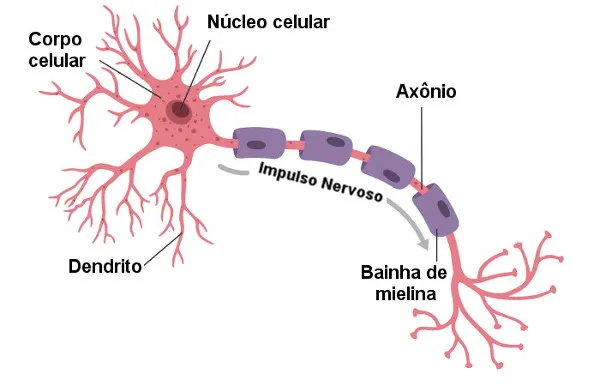

# Aula 8

## Neuronio artificial
Um neuronio artificial é composto por entradas, bias(ainda não abordadas nessa sessão), pesos e função de ativação, onde as entradas são somadas as suas biases, escaladas pelos pesos, somadas e então ativadas, para o caso de um perceprton, a função de ativação é a step, uma função não linear definida por:
$$
f(x) = 
    \begin{cases}
        1, \text{se } x \geq 1 \\
        0, \text{se } x < 1
    \end{cases}
$$
Podemos comparar esse neuronio artificial com o biologico sendo as entradas os dentritos, a soma e ativação acontecendo no corpo celular e a saida sendo nos terminais do axonio.

## Operador E
Recriar o operador AND utilziando perceptrons

In [71]:
class Perceptron():
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size)
        self.ler = learning_rate

    # Função de ativação (step)
    def activation(self, x):
        return 1 if x >=1 else 0

    # Previsão (aka produto escalar das entradas com pesos e aplicar a ativação)
    def predict(self, x):
        z = self.weights.dot(x)
        return self.activation(z)

    # Treino
    def train(self, inputs, labels, epochs=10):
        # Epochs definidos pelo usuario
        for _ in range(epochs):
            # Percorrer todas as entradas e saidas 
            for x, y in zip(inputs, labels):
                # Realiza a predição
                prediction = self.predict(x)
                # Calculo do erro
                err = y - prediction
                # Formula para atualizar os pesos
                self.weights += self.ler*err*np.array(x)
        

In [72]:
# Inputs e labels
inputs = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
labels = np.array([0, 0, 0, 1])

# Cria e treina o perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Testa o perceptron
for x in inputs:
    print(f"Entrada: {x}, Saída: {perceptron.predict(x)}")

# Pesos previstos na video aula
perceptron.weights

Entrada: [0 0], Saída: 0
Entrada: [0 1], Saída: 0
Entrada: [1 0], Saída: 0
Entrada: [1 1], Saída: 1


array([0.5, 0.5])

# Aulas 9, 10

## Redes muticamadas (multilayer perceptron)

Compostas por uma camada de entrada, camadas ocultas e uma saida. Para esse caso, a função utilizada será a sigmoide, definida por:
$$
    f(x) = \frac{1}{1+e^{-x}}
$$

## Operador XOR
Anteriormente, foi implementado um perceptron de 1 camada para realizar predições da porta logica AND, pelo XOR não ser linearmente separavel.

## Calculo do erro em um MLP
Simplesmente subtrair os valores previstos dos valores conhecidos e fazer a média aritmetica.

# Aulas 11, 12, 13

## Descida do Gradiente (gradiente descendente)
Utilizando-se de derivadas parciais, podemos minimizar a função custo (erro ou loss function). 

## Derivada da função sigmoide
É definida por:
$$
    y'(x) = y(x) \cdot (1 - y(x))
$$

## Calculo do parametro delta
O delta da camada de saida é calculado de tal forma que:
$$
    \text{DeltaSaída} = \text{Erro} * \text{DerivadaSigmoide}
$$

O delta da camada oculta é calculado como:
$$
    \text{DeltaEscondida} = \text{DerivadaSigmoide} * \text{pesos} * \text{DeltaSaída}
$$

## Backpropagation
Método para ajustar os pesos quando utilizando o gradiente descendente, o vetor atualizado de pesos é definido como:
$$
    \text{peso}_{n+1} = (\text{peso}_n*\text{momento}) + (\text{entrada}*\text{delta}*\text{taxa de aprendizagem})
$$

Os pesos, por conta do delta, são atualizados da saida para a entrada (direita para a esquerda), as atualizações ocorrem uma vez por decada.

# Aula 14

## BIAS
O parametro bias é basicamente um parametro que é somado as entradas, adicionando assim um ajuste mais fino a rede neural.

## ERRO 
### Formula mais simples:
$$
    \text{erro } = \text{respostaCorreta} - \text{RespostaCalculada}
$$
e então tirar a média

### Mean Squared Error (MSE)
Basicamente a mesma formula acima, mas somando os quadrados dos erros e tirando a média.
$$
    \text{MSE} = \frac{1}{N}\sum_{i=1}^{N}(f_i - y_i)^2
$$

### Root Mean Squared Error (RMSE)
A raiz quadrada do MSE
$$
    \sqrt{\text{MSE}}
$$


## Gradiente
- Batch Gradient Descent: calcula o gradiente da função de custo usando todos os exemplos de treinamento em cada iteração, ajustando os parâmetros do modelo na direção oposta ao gradiente para reduzir o erro.
- Stochastic Gradient Descent: atualiza os parâmetros do modelo usando o gradiente calculado com base em um único exemplo de treinamento por iteração.
- Mini Batch Gradient Descent: é uma variação do Gradient Descent que combina os benefícios do Batch e do Stochastic Gradient Descent. Ele atualiza os parâmetros do modelo usando o gradiente calculado com um pequeno subconjunto (mini-batch) dos exemplos de treinamento em cada iteração.

## Parâmetros
- learning rate
- batch size
- epochs

## Funções de ativação
- Step
- Sigmoide
- Tangente Hiperbolica
- RELU
- Softmax
- Linear


# Aula 15

## Step Function
- Por ser não diferenciavel (não é continua) não é amplamente utilizada em redes complexas.
- Utilzada em problemas linearmente separaveis
$$
f(x) = 
    \begin{cases}
        1, \text{se } x \geq 1 \\
        0, \text{se } x < 1
    \end{cases}
$$

In [8]:
import numpy as np 
# Caso soma seja menor que 1 retorna 0, caso maior 1
def step_function(soma):
    return 1 if soma >= 1 else 0

In [79]:
step_function(-10)

0

In [80]:
step_function(10)

1

## SIGMOID
- Amplamente utilizada em problemas de clasficiação binaria (2 classes).
- Pode ser interpretada como a probabilidade de ser uma classe (mais proximo de 1) ou não (mais proximo de 0)
$$
    f(x) = \frac{1}{1+e^{-x}}
$$

In [85]:
# Retorna o valor da expressão acima
def sigmoid_function(soma):
    return 1 / (1 + np.exp(-soma))

In [82]:
sigmoid_function(-10)

4.5397868702434395e-05

In [83]:
sigmoid_function(10)

0.9999546021312976

In [84]:
sigmoid_function(1)

0.7310585786300049

## Hyperbolic Tangent
- Valores entre -1 e 1
- Utilizada em problemas de visão computacional, como por exemplo autoencoders e GAN's
$$
    f(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
$$

In [90]:
# Retorna o valor da expressão acima
def tahn_function(soma):
    return (np.exp(soma)-np.exp(-soma))/(np.exp(soma)+np.exp(-soma))

In [87]:
tahn_function(-10)

-0.9999999958776926

In [88]:
tahn_function(10)

0.9999999958776926

In [89]:
tahn_function(1)

0.7615941559557649

# Aula 16

## ReLU (Rectfied Linear Units)
- Amplamente utilizada em camadas ocultas de redes de aprendizado profundo
$$
f(x) = 
    \begin{cases}
        0, \text{se } x \leq 0 \\
        x, \text{se } x > 0
    \end{cases}
$$

In [1]:
# Implementação da função mostrada acima
def relu_function(soma):
    return soma if soma >= 0  else 0

In [2]:
relu_function(-20)

0

In [3]:
relu_function(0)

0

In [5]:
relu_function(10)

10

## Softmax
- Utilizada para problemas de classificação com mais de 2 classes
- Retorna as probabilidades de cada caso
$$
y(x) = \frac{\text{e}^x}{\sum\text{e}^x}
$$

In [13]:
# Implementação da função softmax
def softmax_function(x):
    ex = np.exp(x)
    return ex / ex.sum()

In [12]:
softmax_function([7.0, 2.0, 1.3])

array([0.99001676, 0.00667068, 0.00331256])

In [14]:
softmax_function([2.0, 2.0, 5.3])

array([0.03434934, 0.03434934, 0.93130132])

## Linear
- Utilizada em problemas de regressão
$$
f(x) = x
$$

In [19]:
# Implementação da função Linear
def linear_function(soma):
    return soma

In [16]:
linear_function(-10)

-10

In [17]:
linear_function(1)

1

In [18]:
linear_function(10)

10